# Pre-processing Housing Price dataset
Consider that you are analysing a dataset that contains information from houses. You are 
asked  to  develop  a  system  to  predict  the  price  of  the  house  based  on  the  available 
information. Before you move on to build a predictive model you should explore the data to 
better know its characteristics.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [128]:
df.shape

(545, 13)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


By looking at the result from df.info we realize there are no missing values in the dataset

In [130]:
for var in df.columns:
    diff_values = df[var].nunique()
    print(f'{var} has {diff_values} different values')

price has 219 different values
area has 284 different values
bedrooms has 6 different values
bathrooms has 4 different values
stories has 4 different values
mainroad has 2 different values
guestroom has 2 different values
basement has 2 different values
hotwaterheating has 2 different values
airconditioning has 2 different values
parking has 4 different values
prefarea has 2 different values
furnishingstatus has 3 different values


In [131]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


As you can see, the standard deviation of price and area are very high, which means that the values are very spread out. This can be a problem for some machine learning algorithms, so we will need to normalize the data. Let's start by using scikit-learn's StandardScaler to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

In [132]:
features = df[['price', 'area']]

std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(features)
df_std_scaled = pd.DataFrame(features_scaled, columns=['price', 'area'])
df_std_scaled.head()

,price,area
0,4.566365,1.046726
1,4.004484,1.757010
2,4.004484,2.218232
3,3.985755,1.083624
4,3.554979,1.046726


To do the comparison, lets starting by doing a scatter plot of the price and area columns before and after the standardization.

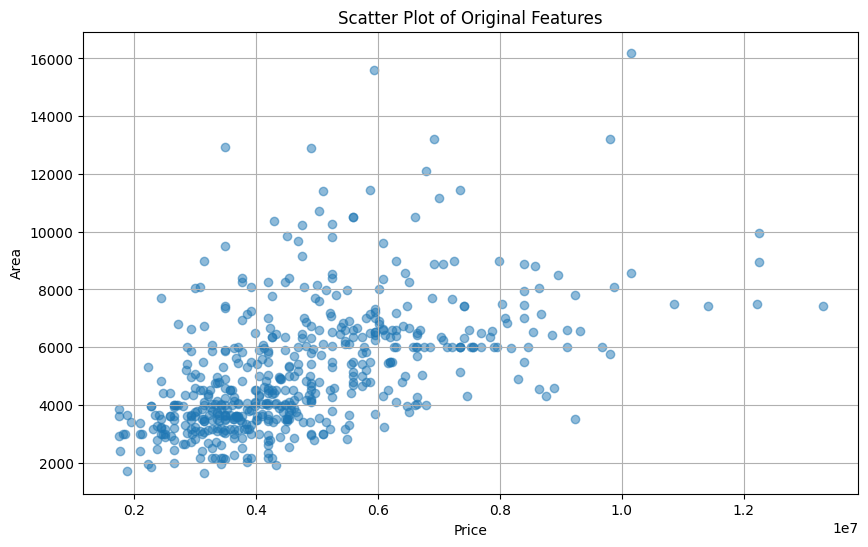

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['area'], alpha=0.5)
plt.title('Scatter Plot of Original Features')
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid(True)
plt.show()

Now, here's the scatter plot of the price and area columns after the standardization.

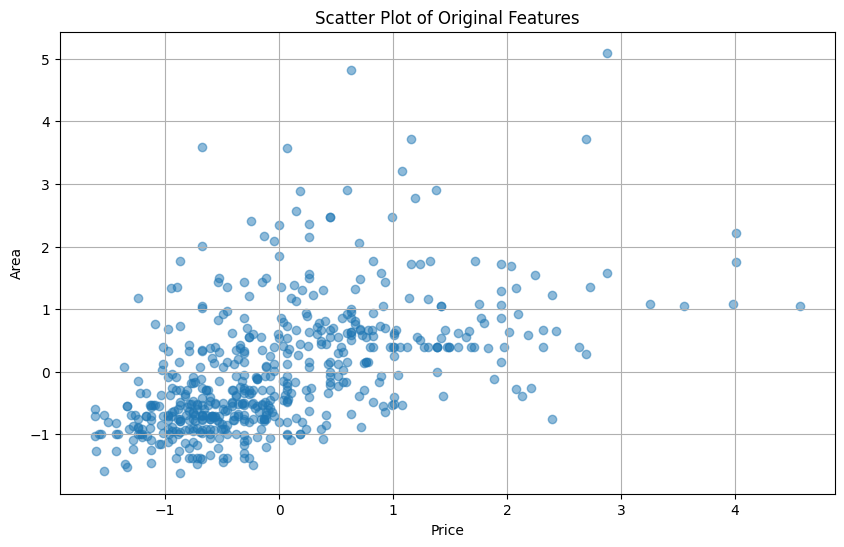

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(df_std_scaled['price'], df_std_scaled['area'], alpha=0.5)
plt.title('Scatter Plot of Original Features')
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid(True)
plt.show()

As you can see, the distribution of the data is the same, but the scale is very different. Now, let's experiment with applying the log transformation to the price column. 

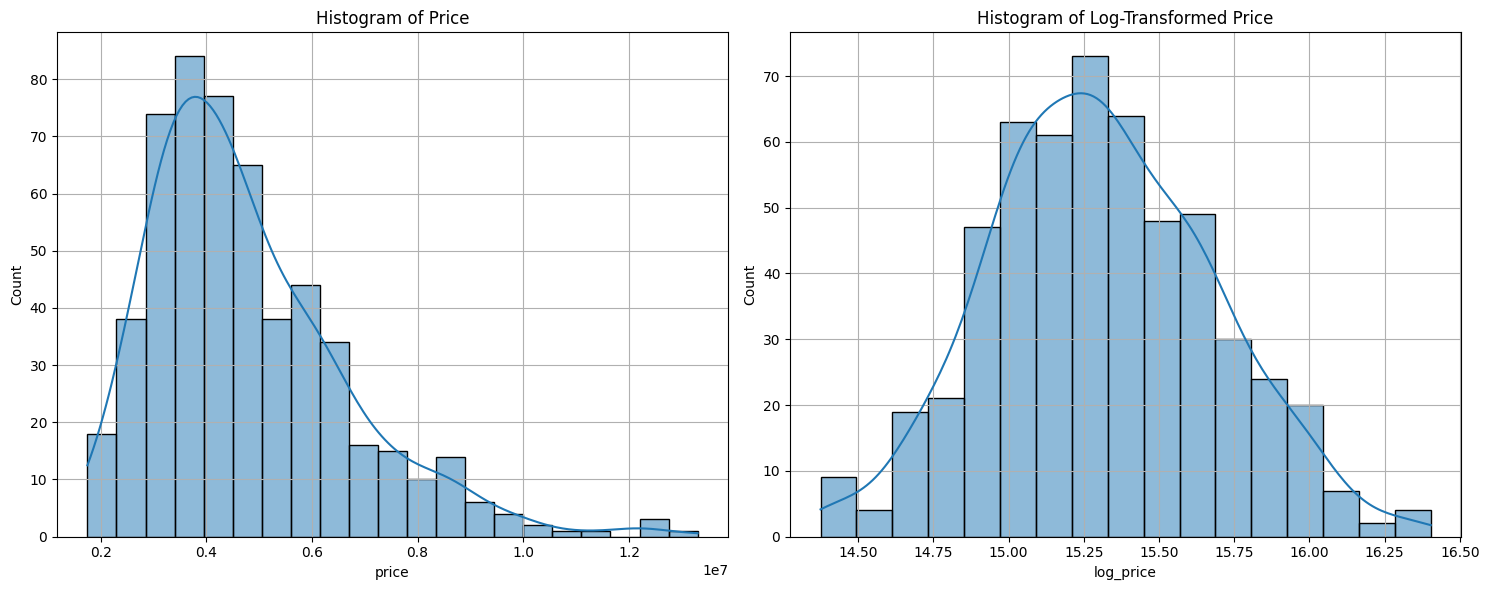

In [135]:
df['log_price'] = np.log(df['price'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].grid(True)

sns.histplot(df['log_price'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of Log-Transformed Price')
axes[1].grid(True)

plt.tight_layout()
plt.show()

As you can observe, by doing a log transformation on the price column, we can see that the data is more normally distributed. This is important because some machine learning algorithms work better when the data is normally distributed.

Now, let's try identify outliers in the price column. For that, we'll use IQR (Interquartile Range) method.

In [136]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(f'The IQR of the price is {IQR}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = df[df['price'] < lower_bound]
print(f'Number of outliers on the lower end: {len(lower_outliers)}')

upper_outliers = df[df['price'] > upper_bound]
print(f'Number of outliers on the upper end: {len(upper_outliers)}')

outliers = pd.concat([lower_outliers, upper_outliers])
print(f'Number of all outliers: {len(outliers)}')

The IQR of the price is 2310000.0
Number of outliers on the lower end: 0
Number of outliers on the upper end: 15
Number of all outliers: 15


From the IQR method, we can see there's about 15 outliers in the price column. Let's create a box plot to visualize the outliers.

<Axes: xlabel='price'>

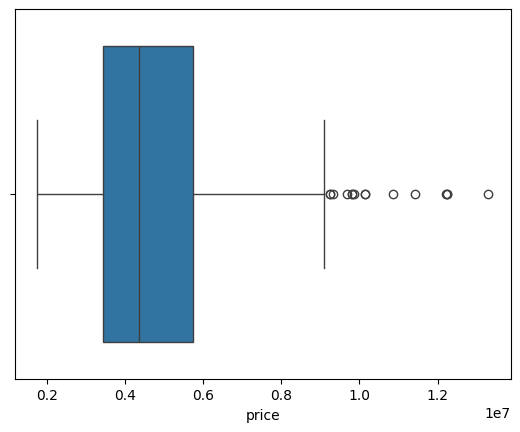

In [137]:
sns.boxplot(x='price', data=df)

As you can see, the outliers are all in the upper range of the price column. Now, let's create a new dataframe without the outliers and compare the mean and median of the price column before and after removing them.

In [138]:
df_no_outliers = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]
print(df.shape)
print(df_no_outliers.shape)

(545, 14)
(530, 14)


In [139]:
print(f"{'Metric':<45} {'Before Removing Outliers':<30} {'After Removing Outliers':<30}")
print(f"{'-'*105}")
print(f"{'Mean of the price':<45} {df['price'].mean():<30,.2f} {df_no_outliers['price'].mean():<30,.2f}")
print(f"{'Median of the price':<45} {df['price'].median():<30,.2f} {df_no_outliers['price'].median():<30,.2f}")
print(f"{'Standard deviation of the price':<45} {df['price'].std():<30,.2f} {df_no_outliers['price'].std():<30,.2f}")

Metric                                        Before Removing Outliers       After Removing Outliers       
---------------------------------------------------------------------------------------------------------
Mean of the price                             4,766,729.25                   4,600,663.09                  
Median of the price                           4,340,000.00                   4,270,000.00                  
Standard deviation of the price               1,870,439.62                   1,596,119.21                  


Overall, removing the outliers resulted in a lower mean and median price, as well as a reduced standard deviation, this happened because the outliers had higher prices that were skewing the data upwards.

### Encoding Categorical Variables
Now, let's use pandas' get_dummies() function to one-hot encode the  'furnishingstatus'  feature.  Then,  use  scikit-learn's  LabelEncoder  to  encode  the 'mainroad', 'guestroom', 'basement'.'hotwaterheating', 'airconditioning', and 'prefarea' features.

In [140]:
furnishingstatus_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df = pd.concat([df, furnishingstatus_dummies], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)

In [141]:
label_enc = LabelEncoder()
df['mainroad'] = label_enc.fit_transform(df['mainroad'])
df['guestroom'] = label_enc.fit_transform(df['guestroom'])
df['basement'] = label_enc.fit_transform(df['basement'])
df['hotwaterheating'] = label_enc.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_enc.fit_transform(df['airconditioning'])
df['prefarea'] = label_enc.fit_transform(df['prefarea'])
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321036,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321036,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,False,False


### Feature Engineering
Let's create a new feature price_per_sqft by dividing the price column by the area column. Then, let's use seaborn's pairplot to visualize the relationship between the price, area and price_per_sqft columns.


In [142]:
df['price_per_sqft'] = df['price'] / df['area']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price,semi-furnished,unfurnished,price_per_sqft
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,False,False,1792.452830
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321036,False,False,1367.187500
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321036,True,False,1229.919679
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,False,False,1628.666667
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,False,False,1537.735849


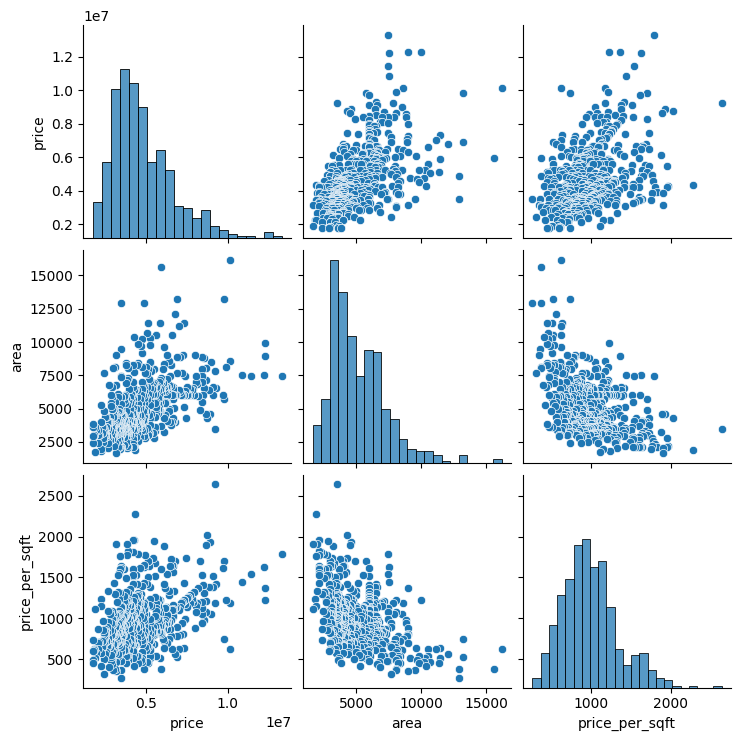

In [ ]:
sns.pairplot(df[['price', 'area', 'price_per_sqft']])
plt.show()

By looking at the pairplot, we can see that the price_per_sqft column has a strong positive correlation with the price column, which means that the price of the house increases as the price per square foot increases. Between the area and price cols we also see a positive correlation, which means that the price of the house increases as the area increases.

### Feature Interaction
Let's create an interaction feature between 'bedrooms' and 'bathrooms' by multiplying them together. Then, let's use pandas to calculate the correlation between the new feature and the price column.

In [ ]:
df['bed_bath'] = df['bedrooms'] * df['bathrooms']

print(f"{'Correlation of bed_bath with price':<45} {df['bed_bath'].corr(df['price']):<30,.2f}")
print(f"{'Correlation of bedrooms with price':<45} {df['bedrooms'].corr(df['price']):<30,.2f}")
print(f"{'Correlation of bathrooms with price':<45} {df['bathrooms'].corr(df['price']):<30,.2f}")

Correlation of bed_bath with price            0.54                          
Correlation of bedrooms with price            0.37                          
Correlation of bathrooms with price           0.52                          


The interaction feature 'bed_bath' has a higher correlation with 'price' compared to the individual correlations of 'bedrooms' and 'bathrooms' with 'price'.



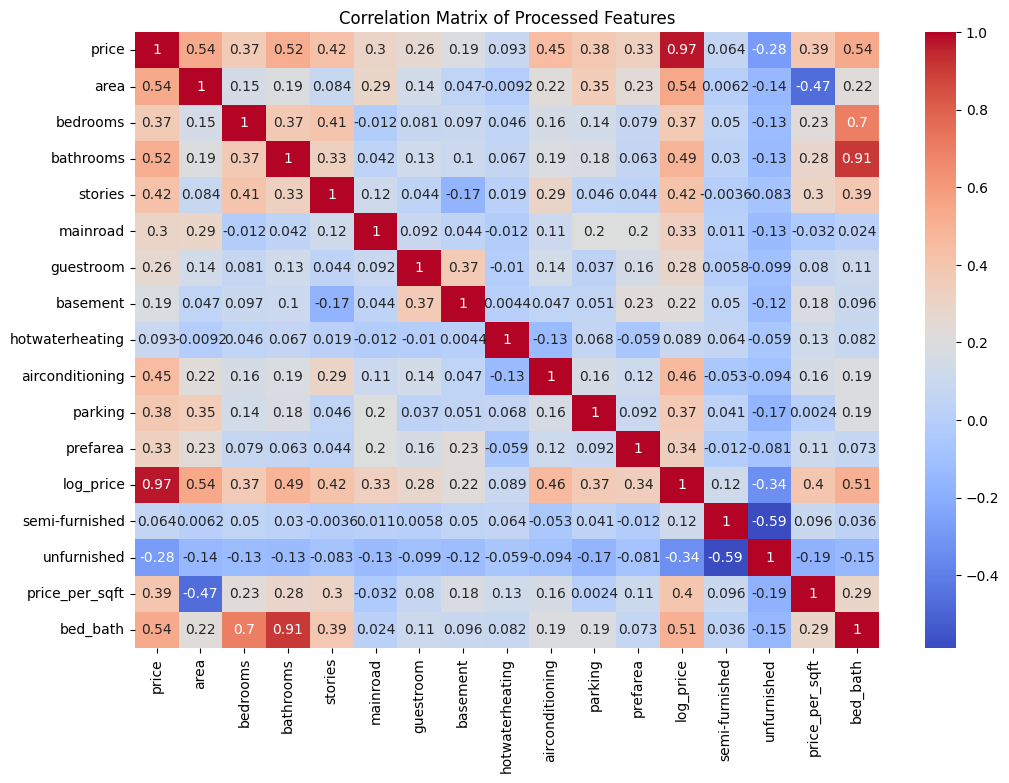

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Processed Features')
plt.show()
